In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os
np.random.seed(42)

In [3]:
filePath = "/cxldata/datasets/project/bikes.csv"
bikesData = pd.read_csv(filePath)

In [4]:
bikesData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
bikesData["yr"].unique() 

array([0, 1])

In [10]:
columnsToDrop = ["instant","casual","registered","atemp","dteday"]
bikesData = bikesData.drop(columnsToDrop,axis=1)

In [11]:
bikesData.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [21]:
np.random.seed(42)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

In [27]:
train_set,test_set = train_test_split(bikesData,test_size=0.3)

In [28]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12165 entries, 1565 to 15873
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      12165 non-null  int64  
 1   yr          12165 non-null  int64  
 2   mnth        12165 non-null  int64  
 3   hr          12165 non-null  int64  
 4   holiday     12165 non-null  int64  
 5   weekday     12165 non-null  int64  
 6   workingday  12165 non-null  int64  
 7   weathersit  12165 non-null  int64  
 8   temp        12165 non-null  float64
 9   hum         12165 non-null  float64
 10  windspeed   12165 non-null  float64
 11  cnt         12165 non-null  int64  
 12  dayCount    12165 non-null  float64
dtypes: float64(4), int64(9)
memory usage: 1.3 MB


In [29]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5214 entries, 5235 to 2141
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      5214 non-null   int64  
 1   yr          5214 non-null   int64  
 2   mnth        5214 non-null   int64  
 3   hr          5214 non-null   int64  
 4   holiday     5214 non-null   int64  
 5   weekday     5214 non-null   int64  
 6   workingday  5214 non-null   int64  
 7   weathersit  5214 non-null   int64  
 8   temp        5214 non-null   float64
 9   hum         5214 non-null   float64
 10  windspeed   5214 non-null   float64
 11  cnt         5214 non-null   int64  
 12  dayCount    5214 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 570.3 KB


In [30]:
train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [32]:
train_set.shape[0],test_set.shape[0]

(12165, 5214)

In [39]:
columnsToScale = ['temp', 'hum', 'windspeed']

In [40]:
scaler = StandardScaler()

In [41]:
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [42]:
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [50]:
train_set[columnsToScale].describe()

,temp,hum,windspeed
count,1.216500e+04,1.216500e+04,1.216500e+04
mean,6.980944e-16,-2.705285e-16,2.804306e-16
std,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.463060e+00,-3.248426e+00,-1.560449e+00
25%,-8.045004e-01,-7.640666e-01,-7.004259e-01
50%,2.477955e-02,1.229586e-02,3.614928e-02
75%,8.540595e-01,7.886583e-01,5.274737e-01
max,2.408960e+00,1.927323e+00,5.440718e+00


In [51]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [52]:
from xgboost import XGBRegressor

In [76]:
trainingCols = train_set.drop(columns=['cnt'])

In [77]:
trainingLabels = train_set['cnt']

In [78]:
dec_reg = DecisionTreeRegressor(random_state = 42)

In [82]:
dt_mae_scores = -cross_val_score(dec_reg,trainingCols,trainingLabels,cv=10,scoring='neg_mean_absolute_error')
display_scores(dt_mae_scores)

Scores: [36.43878389 43.89564503 36.88167625 45.03451109 48.56121611 63.90131579
 59.35773026 55.93585526 49.86924342 97.43421053]
Mean: 53.73101876378498
Standard deviation: 16.872613367290455


In [83]:
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_squared_error"))
display_scores(dt_mse_scores)

Scores: [ 59.87516457  67.29520807  58.11159327  72.80640915  80.22027501
 101.04595261  94.0042561  101.68559645  87.7912774  156.58232029]
Mean: 87.9418052919027
Standard deviation: 27.388809455117975


In [89]:
lin_reg = LinearRegression()

In [92]:
lr_mae_scores = -cross_val_score(lin_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_absolute_error")
display_scores(lr_mae_scores)

Scores: [ 68.63673629  75.19820621 114.83827581  92.58062208  74.97109287
  93.85833641 130.89394503 156.11697421 156.58979907 126.27307391]
Mean: 108.9957061902378
Standard deviation: 31.18521158206369


In [98]:
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_squared_error"))
display_scores(lr_mse_scores)

Scores: [ 86.52957403 102.2623146  133.25149901 119.23770073 103.28824291
 123.49513346 174.17762892 186.3447443  203.38270336 161.00301221]
Mean: 139.29725535398748
Standard deviation: 37.61582003237776


In [103]:
forest_reg = RandomForestRegressor(random_state=42,n_estimators=150)

In [104]:
rf_mae_scores = -cross_val_score(forest_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_absolute_error")
display_scores(rf_mae_scores)

Scores: [34.72772391 31.2398521  29.13856478 32.74031772 35.98174199 43.42262061
 38.32082237 41.80785636 36.2639693  83.84000548]
Mean: 40.74834746158227
Standard deviation: 14.964836540001208


In [106]:
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg,trainingCols,trainingLabels,cv=10,scoring="neg_mean_squared_error"))
display_scores(rf_mse_scores)

Scores: [ 47.57950446  45.69547645  44.7643747   53.56974058  60.00377345
  67.98880847  60.12899096  66.50854632  61.47744743 131.8294574 ]
Mean: 63.95461202338711
Standard deviation: 23.966275776432862


In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
param_grid = [{'n_estimators':[120,150],'max_features':[10,12],'max_depth':[15,28]}]

In [118]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring="neg_mean_squared_error")

In [121]:
grid_search.fit(trainingCols,trainingLabels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=150, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [122]:
grid_search.best_estimator_,grid_search.best_params_

(RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=28, max_features=10, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=120, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 {'max_depth': 28, 'max_features': 10, 'n_estimators': 120})

In [130]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [131]:
feature_importances

array([0.00552398, 0.00382623, 0.0052566 , 0.58306937, 0.00196116,
       0.0200052 , 0.06635623, 0.01600796, 0.10165771, 0.03320149,
       0.00930778, 0.15382628])

In [136]:
final_model = grid_search.best_estimator_

In [137]:
test_set.sort_values("dayCount",axis=0,inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
test_x_cols = (test_set.drop(columns=["cnt"],axis=1)).columns.values

In [143]:
test_y_cols = "cnt"

In [145]:
X_test = test_set.loc[:,test_x_cols]

In [146]:
y_test = test_set.loc[:,test_y_cols]

In [156]:
test_set.loc[:,"predictedCounts_test"] = final_model.predict(X_test)

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [157]:
mse = mean_squared_error(y_test,test_set.loc[:,'predictedCounts_test'])
final_mse = np.sqrt(mse)

In [160]:
test_set.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount,predictedCounts_test
2,1,0,1,2,0,6,0,1,-1.42646,0.892173,-1.560449,32,0.083333,19.816667
4,1,0,1,4,0,6,0,1,-1.32280,0.633386,-1.560449,1,0.166667,3.008333
6,1,0,1,6,0,6,0,1,-1.42646,0.892173,-1.560449,2,0.250000,3.725000
7,1,0,1,7,0,6,0,1,-1.53012,1.202718,-1.560449,3,0.291667,11.541667
9,1,0,1,9,0,6,0,1,-0.90816,0.685143,-1.560449,14,0.375000,40.491667


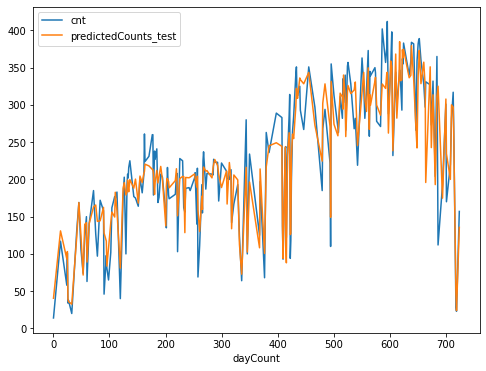

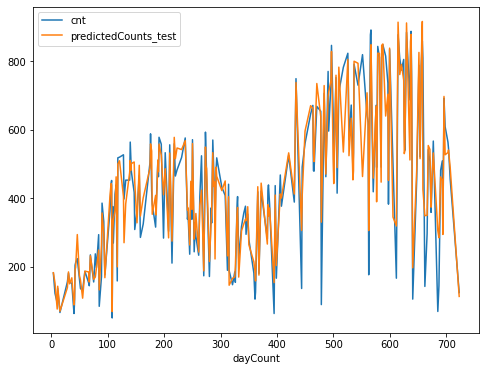

In [161]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()